## **Running the LeNet-5 model by using the MNIST dataset**

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sklearn

In [9]:
ROOT_PATH = "."
MODEL_PATH = os.path.join(ROOT_PATH, "model_train", "Lenet-5")
os.makedirs(MODEL_PATH, exist_ok = True)

Zero-Padding the size of image to 32x32 pixels.

In [11]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

X_train = X_train / 255 
X_test = X_test / 255 

# print(X_train.shape)
# print(X_test.shape)
X_train = tf.pad(X_train, ([0, 0],[2, 2], [2, 2]), mode ='CONSTANT', constant_values = 0, name = None)
X_test = tf.pad(X_test, ([0, 0], [2, 2], [2, 2]), mode = 'CONSTANT', constant_values = 0, name = None)

In [13]:
num_of_valid = int(X_train.shape[0] * 0.2)
num_of_train = X_train.shape[0] - num_of_valid

print(num_of_valid)
print(num_of_train)

12000
48000


Dividing the training dataset to 80/20 %. The new training dataset has 48000 elements and the new validation dataset has 12000 elements  

In [16]:
X_train_model, X_valid_model = X_train[ : num_of_train], X_train[-num_of_valid : ]
Y_train_model, Y_valid_model = Y_train[ : num_of_train], Y_train[-num_of_valid : ]

print(f"Shape of X train model is {X_train_model.shape}")
print(f"Shape of X valid model is {X_valid_model.shape}")
print()
print(f"Shape of Y train model is {Y_train_model.shape}")
print(f"Shape of Y valid model is {Y_valid_model.shape}")

Shape of X train model is (48000, 32, 32)
Shape of X valid model is (12000, 32, 32)

Shape of Y train model is (48000,)
Shape of Y valid model is (12000,)


Add new dimension to the dataset to get 4D-Tensor

In [17]:
X_train_model = X_train_model[..., np.newaxis]
X_valid_model = X_valid_model[..., np.newaxis]

In [18]:
print(f"{X_train_model.shape} || {X_valid_model.shape}")

(48000, 32, 32, 1) || (12000, 32, 32, 1)


In [19]:
X_test_model = X_test[..., np.newaxis]
X_test_model.shape

TensorShape([10000, 32, 32, 1])

Implementing the LeNet-5 Model (Classifying the digits numbers in MNIST dataset)

In [47]:
models = keras.models.Sequential([
    keras.layers.Conv2D(filters = 6, kernel_size = 5, input_shape = [32, 32, 1], activation = "tanh"),
    keras.layers.AvgPool2D(pool_size = 2, strides = 2),
    keras.layers.Conv2D(filters = 16, kernel_size = 5, activation = "tanh"),
    keras.layers.AvgPool2D(pool_size = 2, strides = 2),
    keras.layers.Conv2D(filters = 120, kernel_size = 5, activation = "tanh"),

    keras.layers.Flatten(), 
    # keras.layers.Dense(120, activation = "tanh"),
    keras.layers.Dense(84, activation = "tanh"),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = "softmax")
])

In [48]:
models.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_12 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_24 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_13 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_25 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_4 (Flatten)         (None, 120)             

In [49]:
file_save = os.path.join(MODEL_PATH, "LeNet-5.h5")
checkpoint_cb = keras.callbacks.ModelCheckpoint(file_save, 
                            save_best_only = True)
early_stopping = keras.callbacks.EarlyStopping(patience = 5, 
                        restore_best_weights = True)

In [50]:
X_train_model.shape

TensorShape([48000, 32, 32, 1])

In [52]:
models.compile(loss = "sparse_categorical_crossentropy", 
                optimizer = keras.optimizers.Adam(),
                metrics = ["accuracy"])

history = models.fit(X_train_model, Y_train_model, 
                    batch_size = 128, epochs = 20,
                    validation_data = (X_valid_model, Y_valid_model),
                    callbacks =  [checkpoint_cb, early_stopping])

Epoch 1/20
375/375 [==============================] - 18s 21ms/step - loss: 0.3653 - accuracy: 0.8911 - val_loss: 0.1684 - val_accuracy: 0.9518
Epoch 2/20
375/375 [==============================] - 8s 21ms/step - loss: 0.1389 - accuracy: 0.9580 - val_loss: 0.1213 - val_accuracy: 0.9643
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0952 - accuracy: 0.9716 - val_loss: 0.0949 - val_accuracy: 0.9721
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0716 - accuracy: 0.9780 - val_loss: 0.0842 - val_accuracy: 0.9743
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0563 - accuracy: 0.9824 - val_loss: 0.0779 - val_accuracy: 0.9762
Epoch 6/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0701 - val_accuracy: 0.9793
Epoch 7/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.0724 - val_accuracy: 0.9773
Ep

In [54]:
models.evaluate(X_test_model, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0512 - accuracy: 0.9840


[0.051222141832113266, 0.984000027179718]

In [55]:
X_test_model.shape

TensorShape([10000, 32, 32, 1])

In [77]:
def predict_max(li):
    max_num = li[0]
    max_index = 0

    for i in range (1, len(li)):
        if (max_num < li[i]):
            max_num = li[i]
            max_index = i
    
    return max_index, max_num


In [78]:
K = models.predict(X_test_model[:25])

1/1 [==============================] - 0s 25ms/step


In [85]:
result = []
percentage = []

for i in range (25):
    result.append(predict_max(K[i])[0])
    percentage.append(round(predict_max(K[i])[1] * 100, 2))

print(result)
print(percentage)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4]
[99.97, 99.9, 100.0, 99.98, 99.99, 99.96, 99.54, 99.87, 61.32, 99.97, 99.99, 99.99, 99.99, 99.99, 99.99, 99.95, 99.96, 99.96, 92.24, 100.0, 98.09, 99.99, 99.99, 99.99, 99.99]


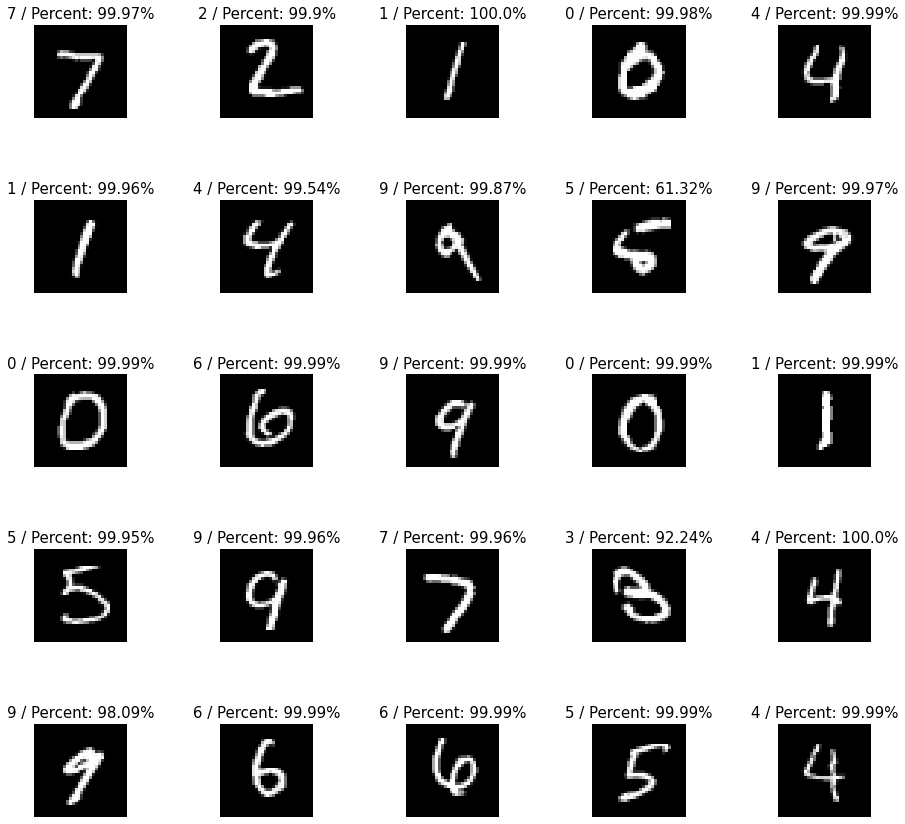

In [87]:
plt.figure(figsize = (15, 15))

for i in range (25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test_model[i, :, :, :], cmap = "gray", interpolation = "nearest")
    plt.title(f"{result[i]} / Percent: {percentage[i]}%", fontsize = 15)
    plt.axis("off")

plt.subplots_adjust(wspace = 1, hspace = 0.5)
plt.show()